<a href="https://colab.research.google.com/github/pasquale90/mthesis/blob/master/Esc50_DataAnalysis_and_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Στο ESC50_DataAnalysis_and_visualizations.ipynb πραγματοποιείται μια προεπεξεργαστική ανάλυση δεδομένων του dataset ESC-50 βάσει των αποτελεσμάτων της οποίας ενδέχεται είτε να προβούμε σε ομοιόμορφο διαμερισμό του περιεχομένου σε k-φακέλους(k-fold), είτε σε ενέργειες επέκτασης περιεχομένου (data augmentation) είτε στην εξαγωγή συμπερασμάτων και προβλέψεων βάσει *αυτών*.


In [1]:
#Import Google_drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [1]:
#Import libraries

import os
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa
import seaborn as sns
import scipy as sp
import pickle

data_path='/content/gdrive/My Drive/dissertation/ESC-50-master/meta/'
audio_path='/content/gdrive/My Drive/dissertation/ESC-50-master/audio/'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
#Import Dataset

#esc50 = pd.read_csv('../content/gdrive/My Drive/dissertation/ESC-50-master/meta/esc50.csv')

#Length column added->give new path-> then do it again after fixed threshold segmentation
esc50 = pd.read_csv(data_path+'esc50_datalengthadded.csv')

audiofiles = os.listdir(audio_path)

print(esc50.shape)
print(len(audiofiles))

(2000, 8)
2000


In [0]:
#Erase double files made by an unspecified uploading error
'''
def unique(list1): 
  x = np.array(list1) 
  return (np.unique(x)) 
unq = unique(num)
print(len(unq))

def removedubs(list1):
  filestoremove=[]
  for f in tqdm(list1):
    if (f in esc50.index):
      continue
  else:
    filestoremove.append(f)
  print(filestoremove)  
  
  for f in filestoremove:
    !rm str('/content/gdrive/My Drive/dissertation/ESC-50-master/audio/'+f)
'''

In [0]:
#Columns Overview 
esc50.info()
print('\n')
print(list(set(esc50.dtypes.tolist())))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  2000 non-null   object 
 1   fold      2000 non-null   int64  
 2   target    2000 non-null   int64  
 3   category  2000 non-null   object 
 4   esc10     2000 non-null   bool   
 5   src_file  2000 non-null   int64  
 6   take      2000 non-null   object 
 7   length    2000 non-null   float64
dtypes: bool(1), float64(1), int64(3), object(3)
memory usage: 111.5+ KB


[dtype('int64'), dtype('O'), dtype('float64'), dtype('bool')]


In [0]:
#create a new column for data dist -> our goal to depict avg audio length per class
#{Have already run}

'''
#create a CIRCLE pyplot
for f in tqdm(esc50.index):

  rate, signal = wavfile.read('/content/gdrive/My Drive/dissertation/ESC-50-master/audio/'+f)
  
  esc50.at[f, 'length']=signal.shape[0]/rate

esc50.reset_index(inplace=True)
esc50.to_csv('../content/gdrive/My Drive/dissertation/ESC-50-master/meta/esc50_datalengthadded.csv',header=True,index=False)
esc50.set_index('filename',inplace=True)
'''
#class dist basic statistics based on the length 
print(esc50['length'].describe())

count    2000.0
mean        5.0
std         0.0
min         5.0
25%         5.0
50%         5.0
75%         5.0
max         5.0
Name: length, dtype: float64


In [3]:
#Store classes 
#Create a class_dist so as to plot a graphical presentation

classes =  list (np.unique(esc50.category))
print(classes)

class_dist = esc50.groupby(['category'])['length'].mean()
print(class_dist)

['airplane', 'breathing', 'brushing_teeth', 'can_opening', 'car_horn', 'cat', 'chainsaw', 'chirping_birds', 'church_bells', 'clapping', 'clock_alarm', 'clock_tick', 'coughing', 'cow', 'crackling_fire', 'crickets', 'crow', 'crying_baby', 'dog', 'door_wood_creaks', 'door_wood_knock', 'drinking_sipping', 'engine', 'fireworks', 'footsteps', 'frog', 'glass_breaking', 'hand_saw', 'helicopter', 'hen', 'insects', 'keyboard_typing', 'laughing', 'mouse_click', 'pig', 'pouring_water', 'rain', 'rooster', 'sea_waves', 'sheep', 'siren', 'sneezing', 'snoring', 'thunderstorm', 'toilet_flush', 'train', 'vacuum_cleaner', 'washing_machine', 'water_drops', 'wind']
category
airplane            5.0
breathing           5.0
brushing_teeth      5.0
can_opening         5.0
car_horn            5.0
cat                 5.0
chainsaw            5.0
chirping_birds      5.0
church_bells        5.0
clapping            5.0
clock_alarm         5.0
clock_tick          5.0
coughing            5.0
cow                 5.0
cr

In [4]:
#Calculate deviation for each class_as we see all lengths are the same.how convenient..?
class_dev = esc50.groupby(['target'])['length'].std()
print(class_dev)

target
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
49    0.0
Name: length, dtype: float64


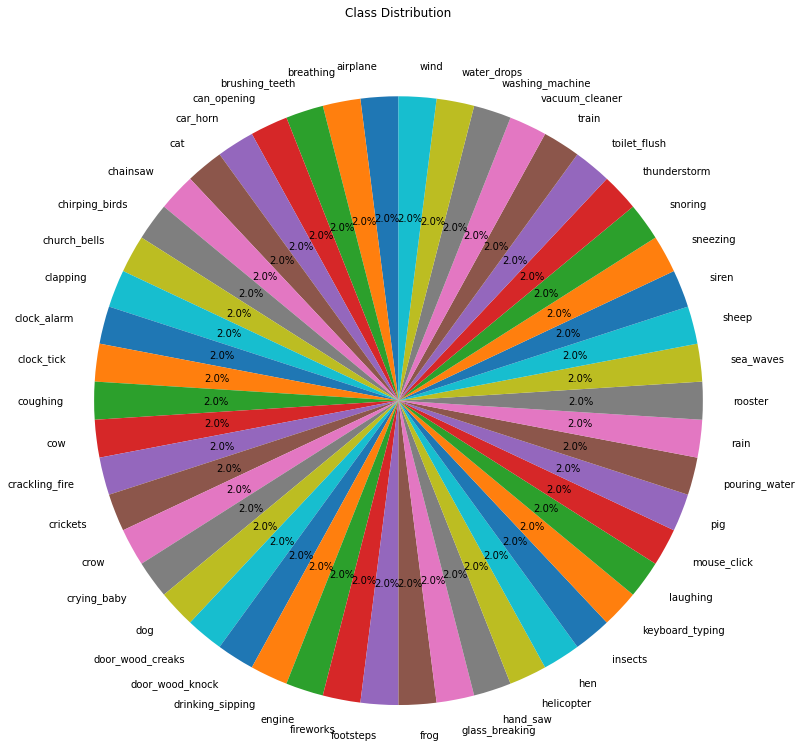

In [0]:
# Plot class distribution

fig ,ax = plt.subplots(figsize=(12,12))
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dist, labels=class_dist.index, autopct='%1.1f%%', shadow=False, startangle=90 ,radius=37)
ax.axis('equal')#circle
plt.show()
#https://stackoverflow.com/questions/49199164/increasing-pie-chart-size-with-matplotlib-radius-parameter-appears-to-do-nothin

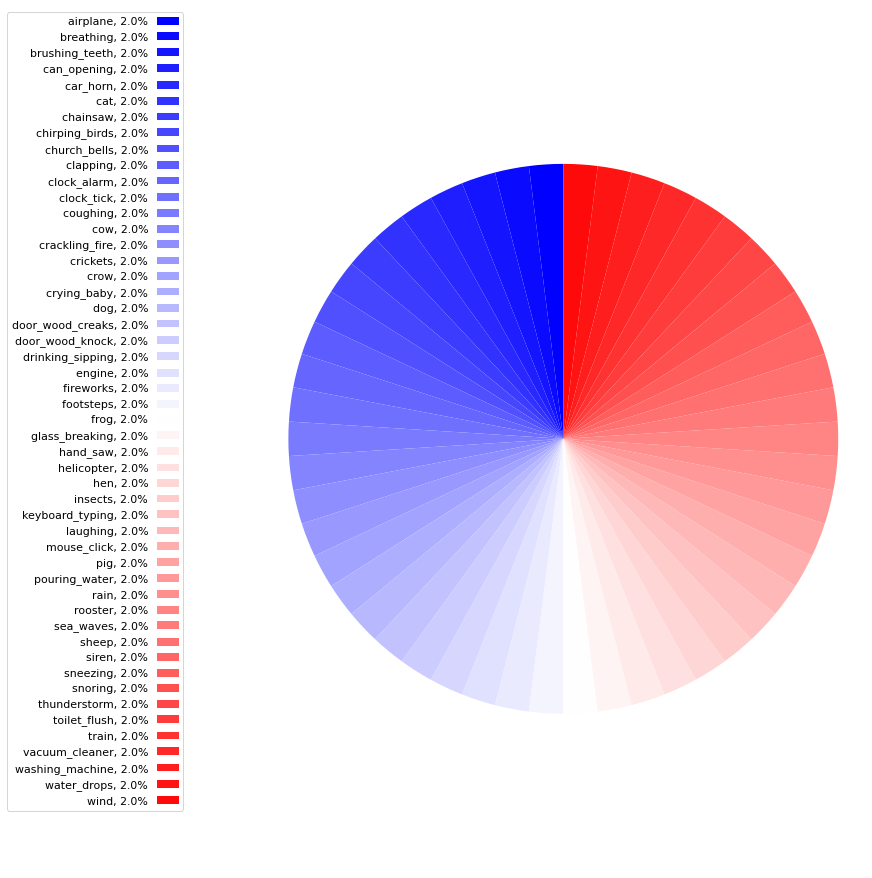

In [35]:
# Plot an alternative plot for class distribution - pie_II

fig1, ax1 = plt.subplots(figsize=(12, 12))
fig1.subplots_adjust(0.3,0,1,1)


theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(class_dist)) for i in range(len(class_dist))])

_, _ = ax1.pie(class_dist, startangle=90)

ax1.axis('equal')

total = sum(class_dist)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(classes, class_dist)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure,  
    markerfirst=False
)

plt.show()

In [5]:
fold_dist=esc50.groupby(['fold','target'])['category'].count()#8 files of each class in each fold
print(fold_dist)

fold  target
1     0         8
      1         8
      2         8
      3         8
      4         8
               ..
5     45        8
      46        8
      47        8
      48        8
      49        8
Name: category, Length: 250, dtype: int64


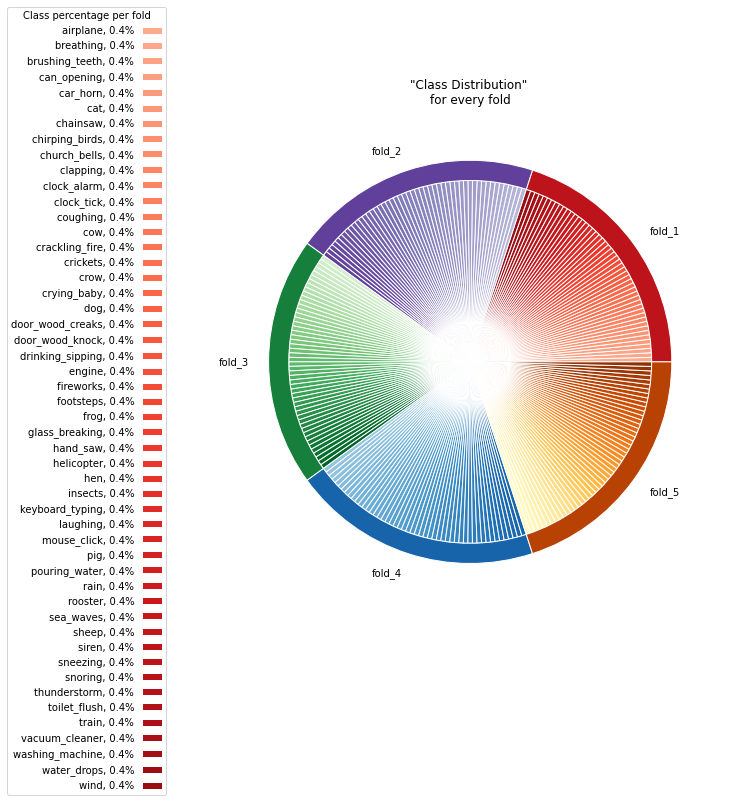

In [0]:
# Plot FOLD DISTRIBUTION
#*https://stackoverflow.com/questions/57720935/how-to-use-correct-cmap-colors-in-nested-pie-chart-in-matplotlib

fpf=np.array((esc50.groupby(['fold'])['category'].count()/len(esc50.index)*100).astype(int))
#fpf =[20, 20, 20, 20 ,20] #Percentage of files for each folder
cpf=np.array((fold_dist/len(esc50.index))*100)#class percentage in each folder
#cpf = np.array(np.ones(250)*0.4)

fig ,ax = plt.subplots(figsize=(10,10))
fig.subplots_adjust(0.3,0,1,1)

size = 0.1#size of the outer
total = sum(fold_dist)

#one for each fold
cmap1 = plt.cm.Reds
cmap2 = plt.cm.Purples
cmap3 = plt.cm.Greens
cmap4 = plt.cm.Blues
cmap5 = plt.cm.YlOrBr

outer_colors = [cmap1(.8), cmap2(.8), cmap3(.8),cmap4(.8),cmap5(.8)]
inner_colors = [*cmap1(np.linspace(.3, .9, 50)),
                *cmap2(np.linspace(.4, .8, 50)),
                *cmap3(np.linspace(.2, .9, 50)),
                *cmap4(np.linspace(.4, .8, 50)),
                *cmap5(np.linspace(.1, .9, 50)),]

#folds =  list (np.unique(esc50.fold))
folds = ['fold_1','fold_2','fold_3','fold_4','fold_5']

ax.pie(cpf, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=1, edgecolor='w'))

ax.pie(fpf, radius=1, labels=folds, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='\"Class Distribution\" \nfor every fold')

plt.legend(
  loc='upper left',
  labels=['%s, %1.1f%%' % (
      l,(float(s) / total) * 100) for l, s in zip(classes, fold_dist)],
  bbox_to_anchor=(0.0, 1),
  bbox_transform=fig.transFigure,
  markerfirst=False,
  title='Class percentage per fold'
)


In [6]:
folds =  list (np.unique(esc50.fold))
print(folds)

[1, 2, 3, 4, 5]


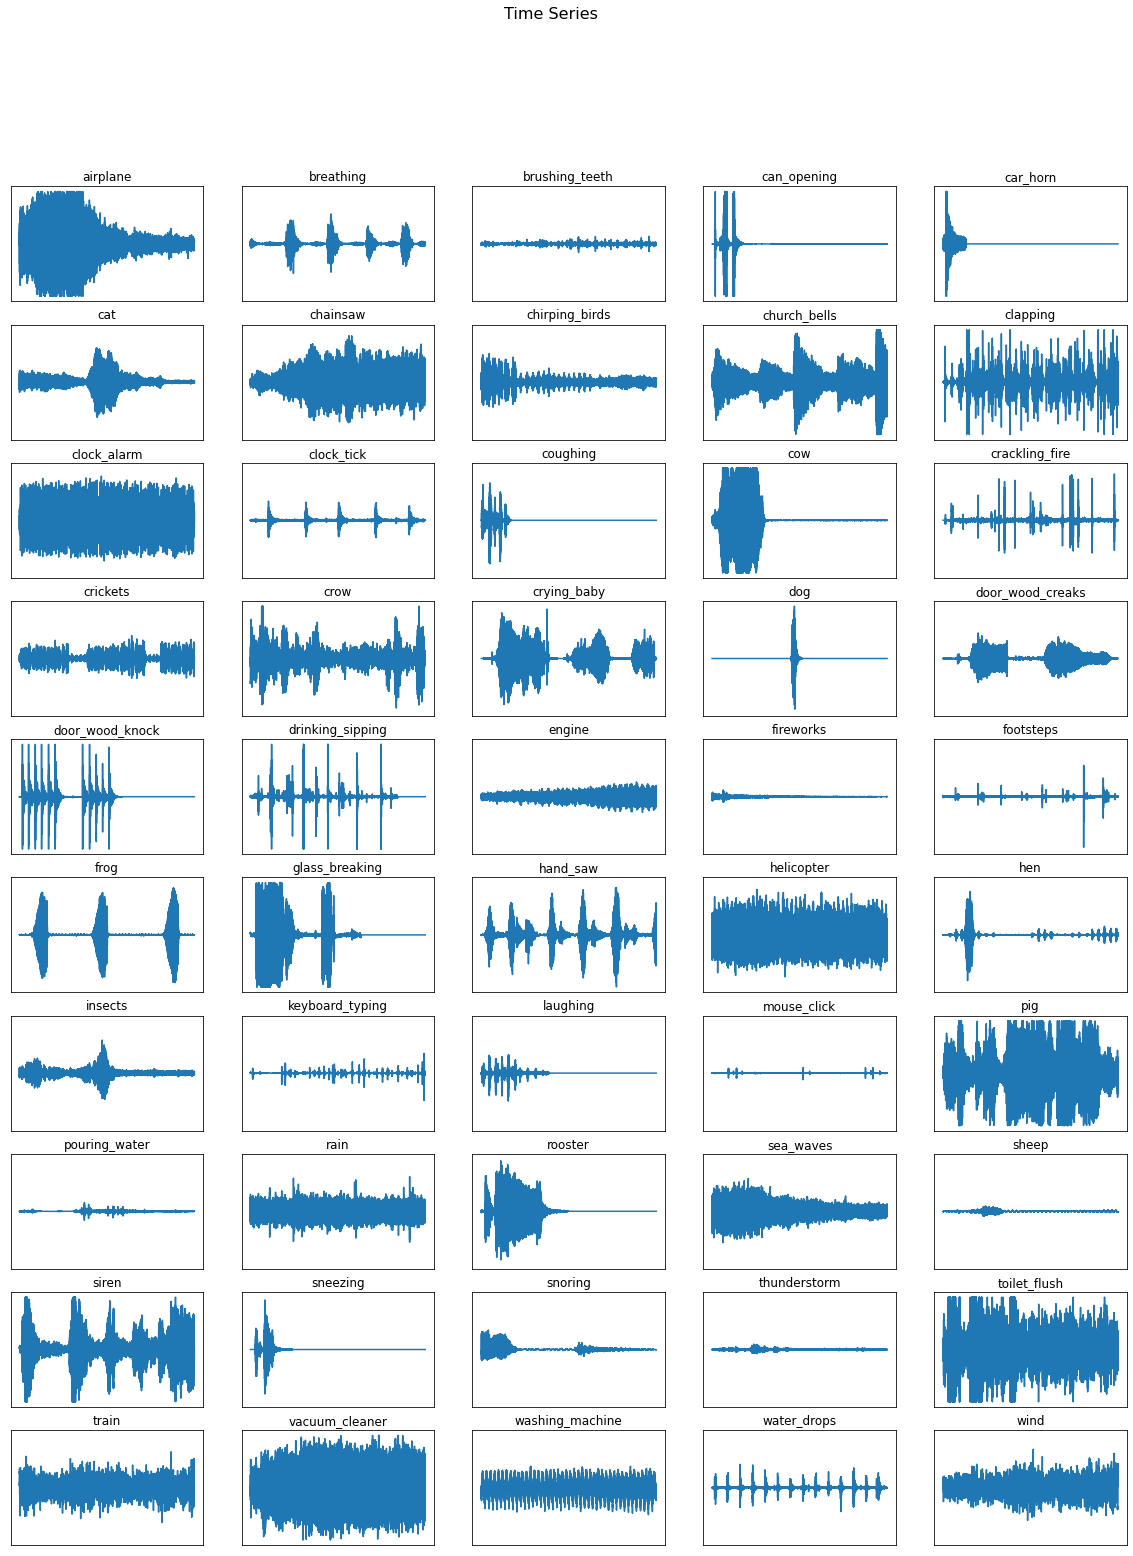

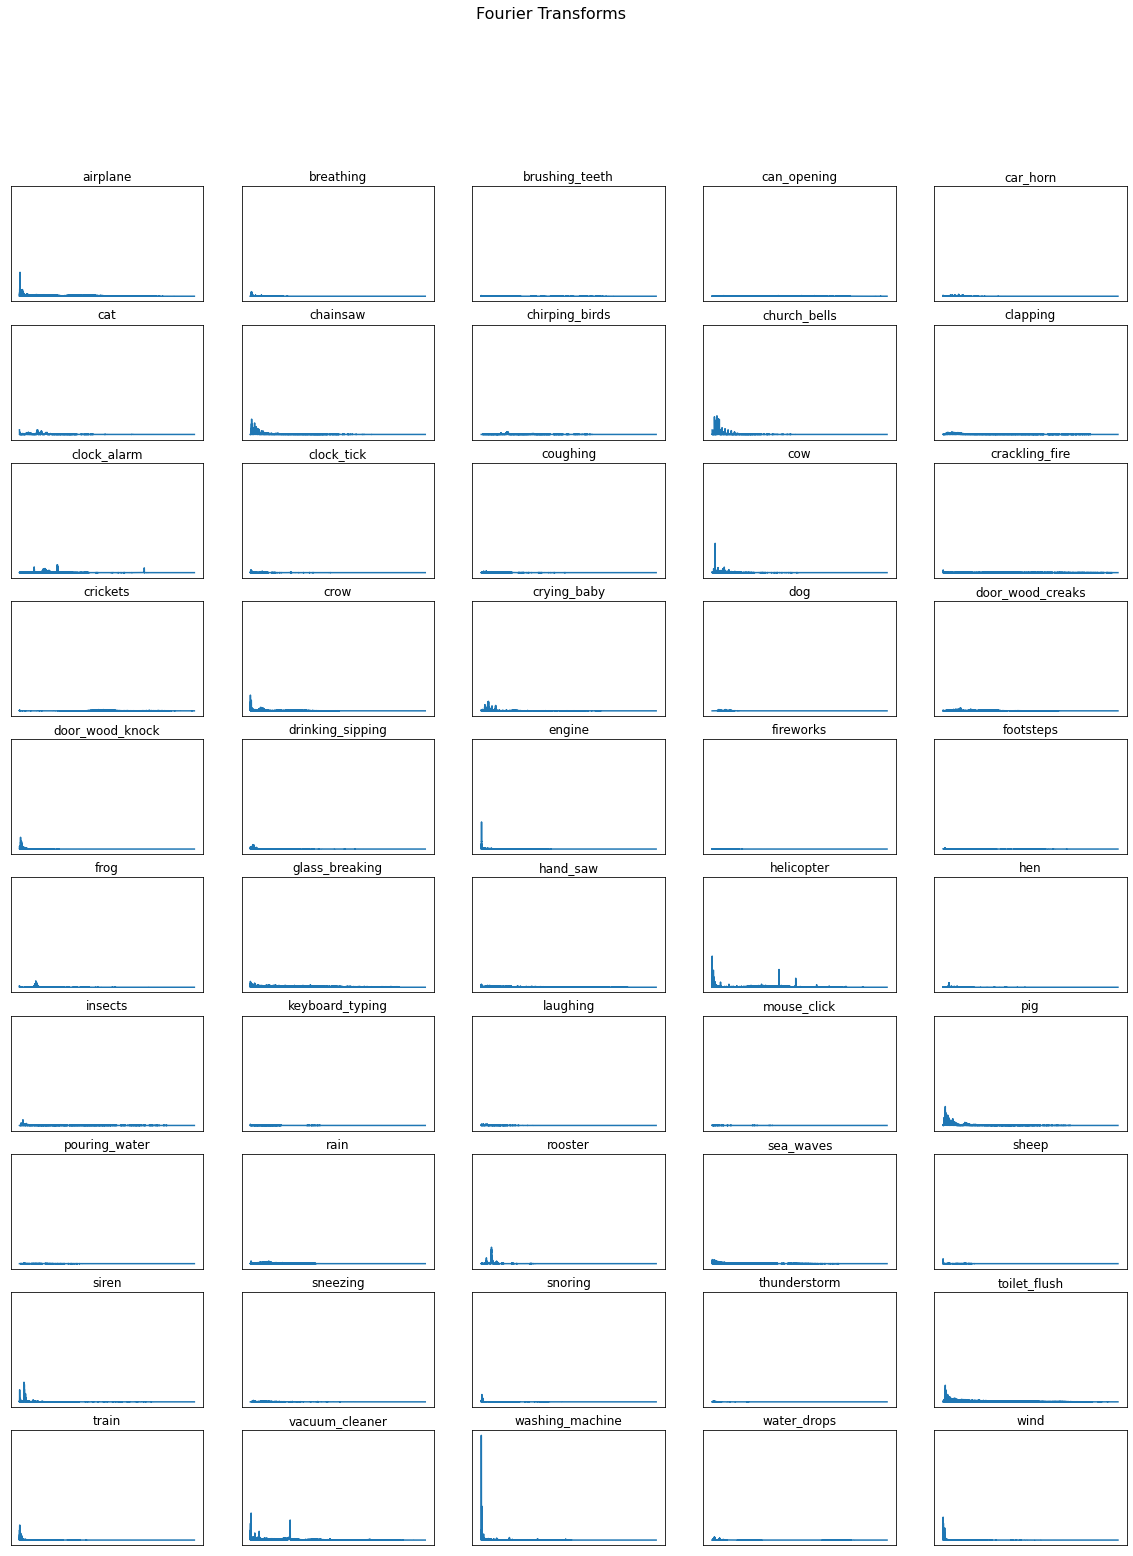

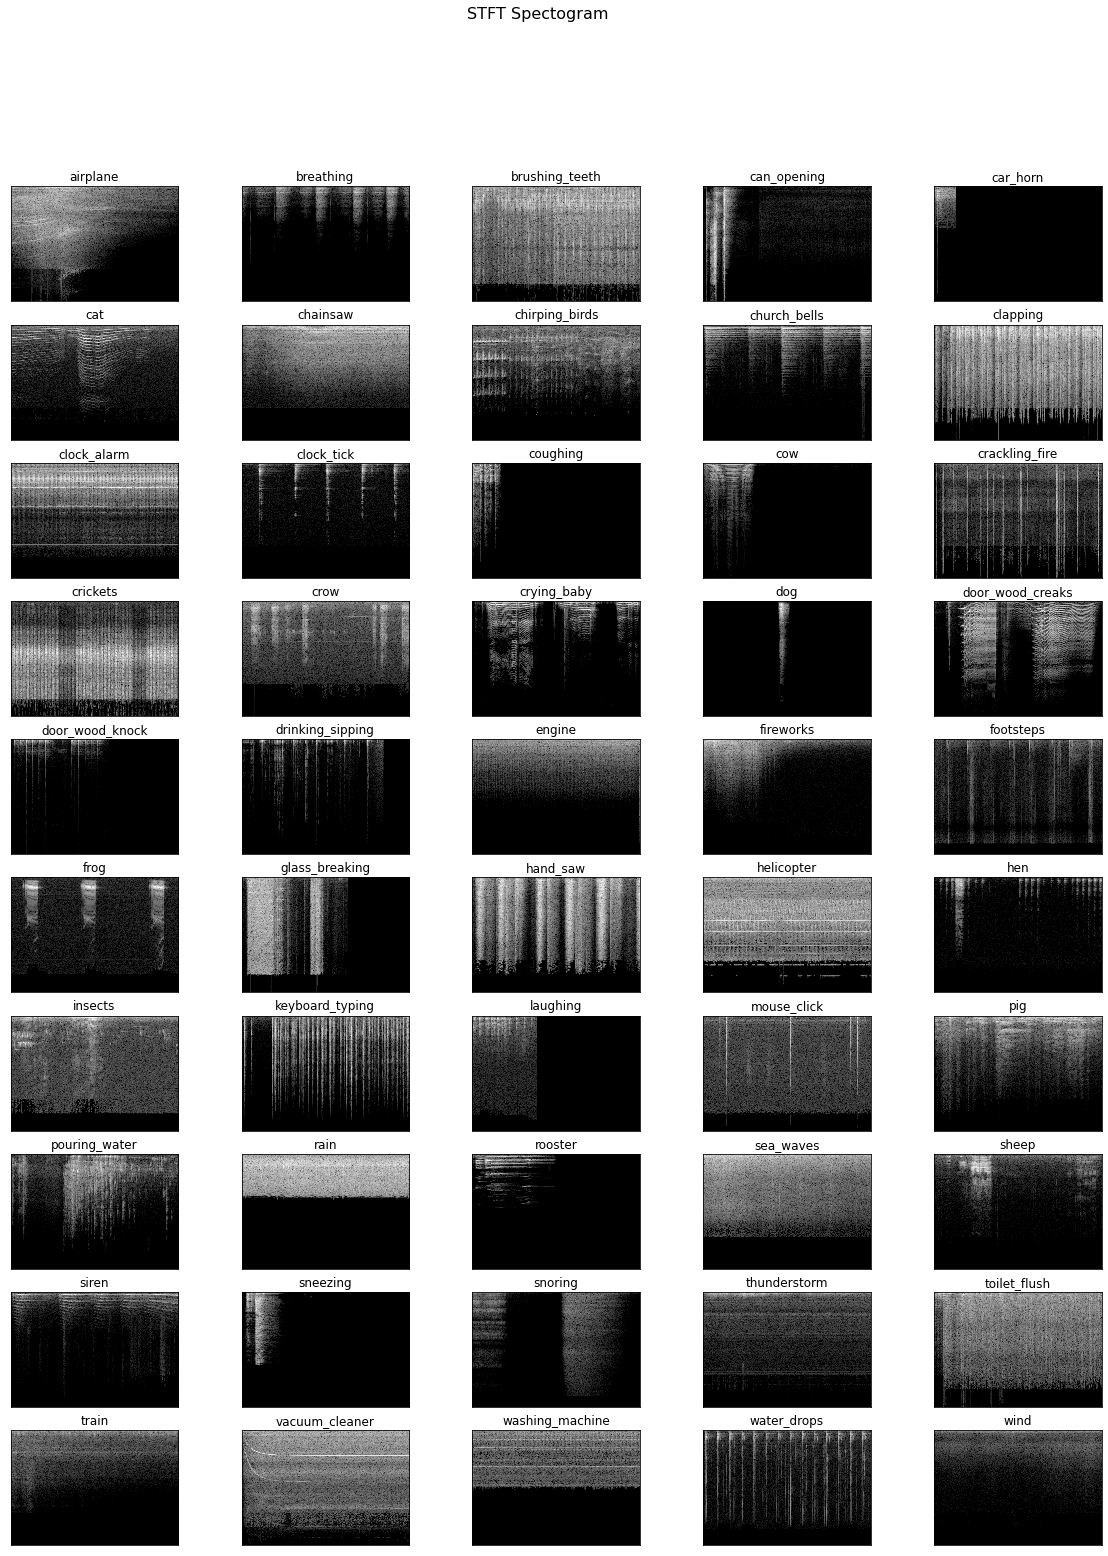

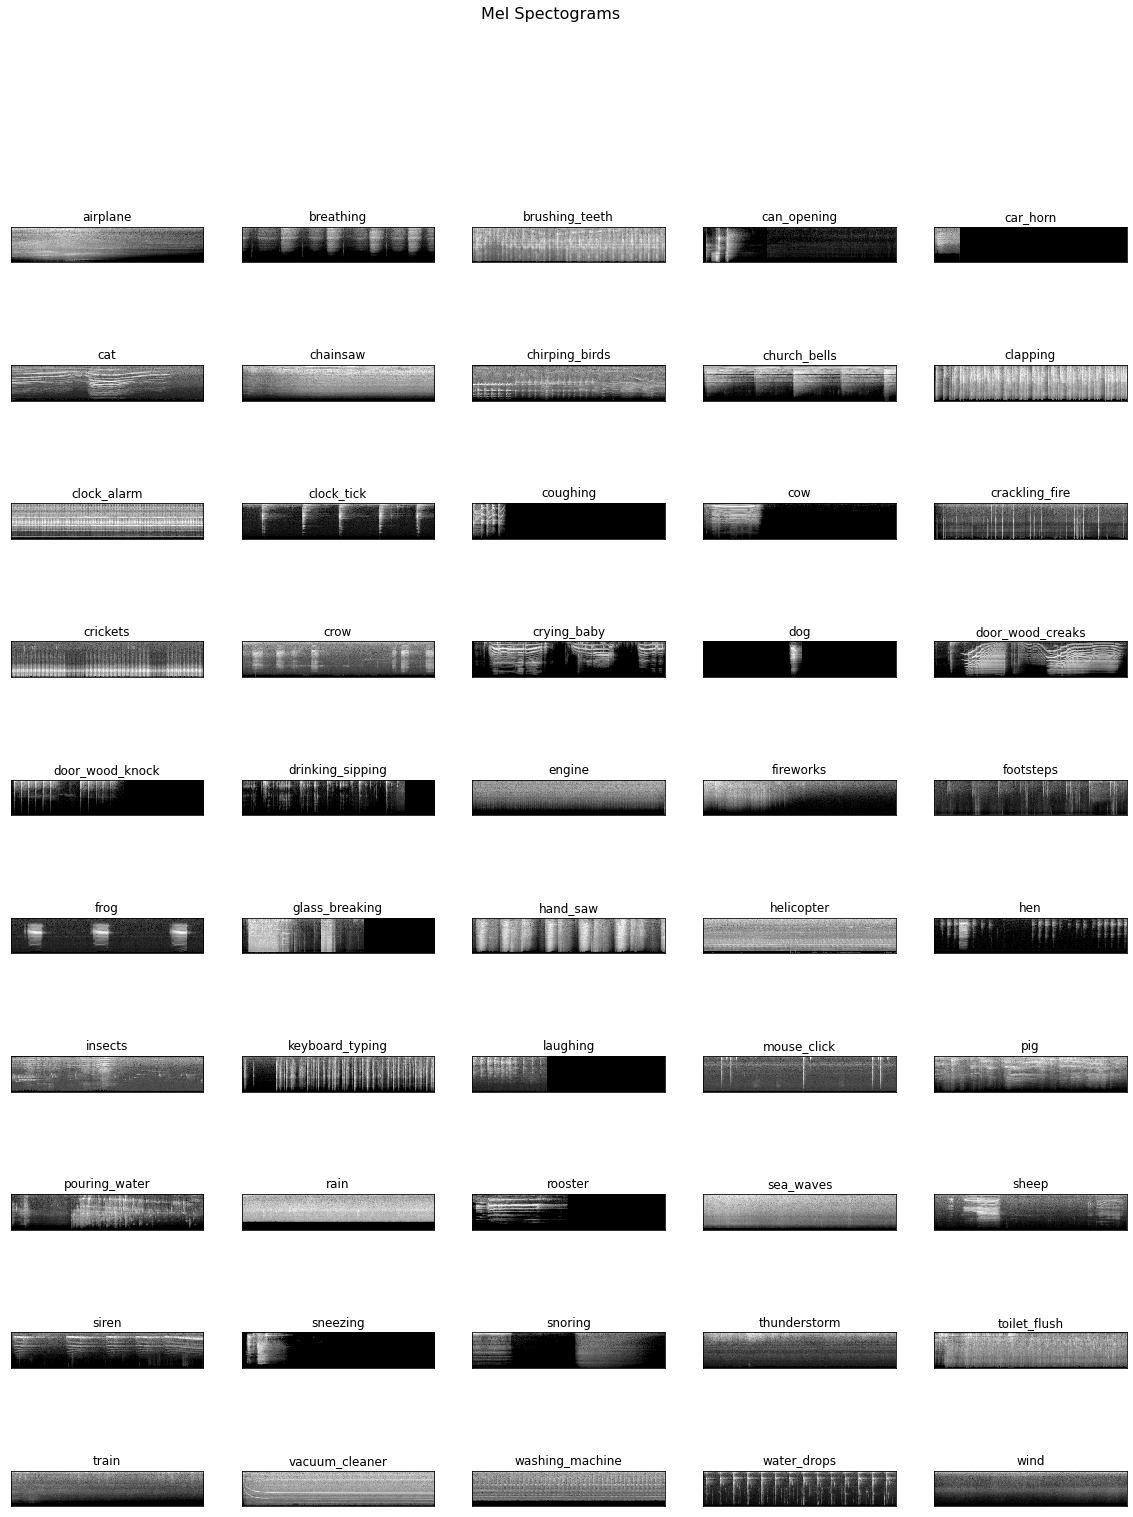

In [12]:
#PLOTS {Waveform, Spectrum, STFT-linear spectogram, log-Mel Spectogram}
#plot only the first file's info, for each of the 50 different classes

'''
***find an optimal window: http://support.ircam.fr/docs/AudioSculpt/3.0/co/Window%20Size.html ***
'''

def plot_signals(signals):
  fig, axes = plt.subplots(nrows=10,ncols=5,sharex=False,sharey=True,figsize=(20,25))
  fig.suptitle('Time Series', size=16)
  i=0
  for x in range(10):
    for y in range(5):
      axes[x,y].set_title(list(signals.keys())[i])
      axes[x,y].plot(list(signals.values())[i])
      axes[x,y].get_xaxis().set_visible(False)
      axes[x,y].get_yaxis().set_visible(False)
      i +=1

def plot_fft(fft):
  fig, axes = plt.subplots(nrows=10,ncols=5,sharex=False,sharey=True,figsize=(20,25))
  fig.suptitle('Fourier Transforms', size=16)
  i=0

  for x in range(10):
    for y in range(5):
      data = list(fft.values())[i]
      Y, freq =  data[0], data[1]
      axes[x,y].set_title(list(fft.keys())[i])
      axes[x,y].plot(freq, Y)
      axes[x,y].get_xaxis().set_visible(False)
      axes[x,y].get_yaxis().set_visible(False)
      i +=1 

def calc_fft(y,rate):
  n = len(y)
  freq = np.fft.rfftfreq(n, d=1/rate)#d = periodos tou simatos
  Y = abs(np.fft.rfft(y)/n)#/n is the normalize factor(n=length of the signal)
  return(Y, freq)

def plot_linspectogram(stft):#as a spectogram
  fig, axes = plt.subplots(nrows=10,ncols=5,sharex=False,sharey=True,figsize=(20,25))
  fig.suptitle('STFT Spectogram', size=16)
  i=0
  for x in range(10):
    for y in range(5):
      axes[x,y].set_title(list(stft.keys())[i])
      axes[x,y].imshow(list(stft.values())[i], cmap='gray', interpolation='nearest')
      axes[x,y].get_xaxis().set_visible(False)
      axes[x,y].get_yaxis().set_visible(False)
      i +=1 


def plot_melspectogram(melspectograms):
  fig, axes = plt.subplots(nrows=10,ncols=5,sharex=False,sharey=True,figsize=(20,25))
  fig.suptitle('Mel Spectograms', size=16)
  i=0

  for x in range(10):
    for y in range(5):
      axes[x,y].set_title(list(melspectograms.keys())[i])
      axes[x,y].imshow(list(melspectograms.values())[i], cmap='gray', interpolation='nearest')
      axes[x,y].get_xaxis().set_visible(False)
      axes[x,y].get_yaxis().set_visible(False)
      i +=1 

signals = {}
fft = {}
stft = {}
melspectograms = {}

nfft=1103  #40 windows per second means that the win_length is 25ms containing 1103 avg_samples
win_size=1024
hop_size=int(round(win_size/2))



for c in classes:
  wav_file = esc50[esc50.category == c].iloc[0,0]#one sample for each class_the first
  signal, rate = librosa.load(audio_path+wav_file, sr=44100)#audio_path is already set on top


  signals[c]=signal

  fft[c]= calc_fft(signal,rate)


  stfts= librosa.core.stft(signal, n_fft=nfft) #, hop_length=hop_size, win_length=win_size
  magnitude = np.abs(stfts)
  db_stft = librosa.amplitude_to_db(magnitude,ref=np.max)
  stft[c] = db_stft
  #stft[c] = magnitude

  S=librosa.feature.melspectrogram(y=signal.astype(float), sr=rate, n_fft=nfft, S=None, power=2,n_mels=80 )
  log_S = librosa.power_to_db(S, ref=np.max)
  melspectograms[c]=log_S 
                                    
plot_signals(signals)
plt.show()

plot_fft(fft)
plt.show()

plot_linspectogram(stft)
plt.show()

plot_melspectogram(melspectograms)
plt.show() 

In [13]:
esc50.set_index('filename',inplace=True)
#esc50.reset_index(inplace=True)
print(esc50.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1-100032-A-0.wav to 5-9032-A-0.wav
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fold      2000 non-null   int64  
 1   target    2000 non-null   int64  
 2   category  2000 non-null   object 
 3   esc10     2000 non-null   bool   
 4   src_file  2000 non-null   int64  
 5   take      2000 non-null   object 
 6   length    2000 non-null   float64
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 111.3+ KB
None


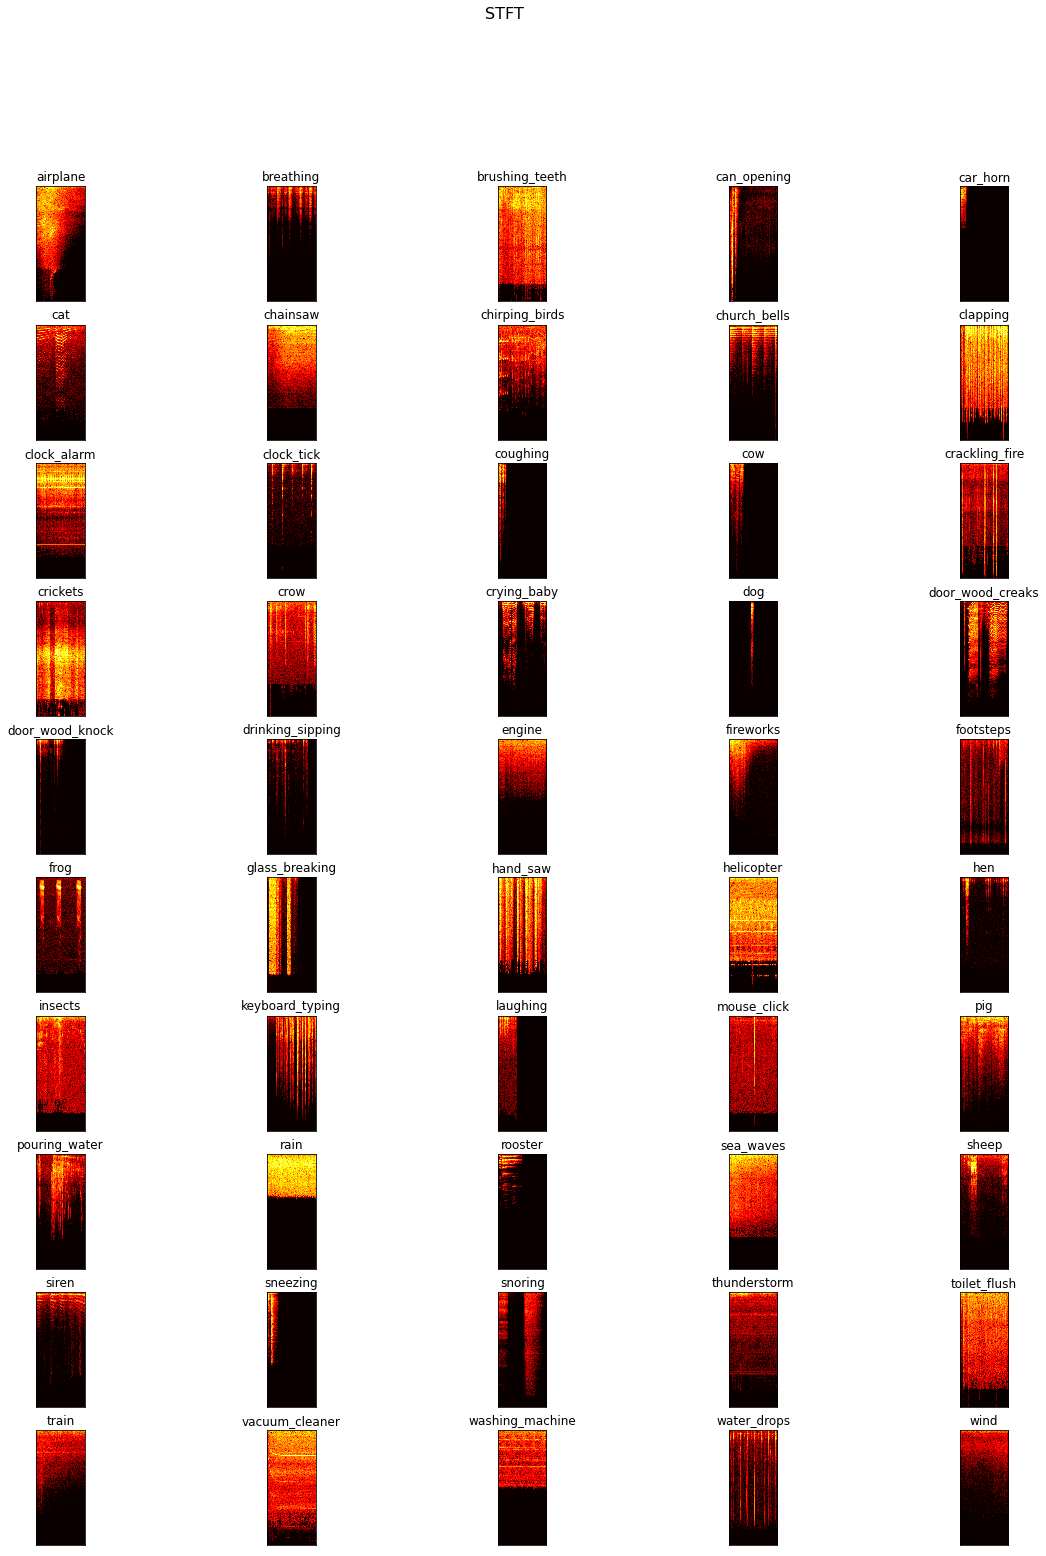

In [0]:
#@title #PLOTS LINEAR SPECTOGRAM ATTEMPT
#PLOTS LINEAR SPECTOGRAM ATTEMPT

#fft size and window size
#http://support.ircam.fr/docs/AudioSculpt/3.0/co/Window%20Size.html

def plot_fft(fft):
  fig, axes = plt.subplots(nrows=10,ncols=5,sharex=False,sharey=True,figsize=(20,25))
  fig.suptitle('Fourier Transforms', size=16)
  i=0

  #plot only one for each of the 50 classes
  for x in range(10):
    for y in range(5):
      data = list(fft.values())[i]
      Y, freq =  data[0], data[1]
      axes[x,y].set_title(list(fft.keys())[i])
      axes[x,y].plot(freq, Y)
      axes[x,y].get_xaxis().set_visible(False)
      axes[x,y].get_yaxis().set_visible(False)
      i +=1 


def calc_fft(y,rate):
  n = len(y)
  freq = np.fft.rfftfreq(n, d=1/rate)#d = periodos
  Y = abs(np.fft.rfft(y)/n)#/n is the normalize factor(n=length of the signal)
  return(Y, freq)

def plot_melspectogram(melspectograms):
  fig, axes = plt.subplots(nrows=10,ncols=5,sharex=False,sharey=True,figsize=(20,25))
  fig.suptitle('Mel Spectograms', size=16)
  i=0

  for x in range(10):
    for y in range(5):
      axes[x,y].set_title(list(melspectograms.keys())[i])
      axes[x,y].imshow(list(melspectograms.values())[i], cmap='gray', interpolation='nearest')
      axes[x,y].get_xaxis().set_visible(False)
      axes[x,y].get_yaxis().set_visible(False)
      i +=1 

def plot_stft(stft):#as a spectogram
  fig, axes = plt.subplots(nrows=10,ncols=5,sharex=False,sharey=True,figsize=(20,25))
  fig.suptitle('STFT', size=16)
  i=0
  for x in range(10):
    for y in range(5):
      
      axes[x,y].set_title(list(stft.keys())[i])
      axes[x,y].imshow(list(stft.values())[i], cmap='hot', interpolation='nearest')
      axes[x,y].get_xaxis().set_visible(False)
      axes[x,y].get_yaxis().set_visible(False)
      i +=1 
      '''
      librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time')
      plt.title('Power spectrogram')
      plt.colorbar(format='%+2.0f dB')
      plt.tight_layout()
      '''
      

stft = {}
fft = {}
melspectograms = {}

nfft=1103
win_size=1024
hop_size=int(round(win_size/2))

audio_path='/content/gdrive/My Drive/dissertation/ESC-50-master/audio/'

num=0

for c in classes:
  wav_file = esc50[esc50.category == c].iloc[0,0]#one sample for each class_the first
  signal, rate = librosa.load(audio_path+wav_file, sr=44100)

  #f = calc_fft(signal,rate)
  #fft[c]=f
  
  st= librosa.core.stft(signal, n_fft=2048, hop_length=hop_size, win_length=win_size)
  stfts = np.abs(st)
  tfts=librosa.amplitude_to_db(stfts,ref=np.max)
  stft[c] = tfts

  S=librosa.feature.melspectrogram(y=signal.astype(float), sr=rate, n_fft=1103, S=None, power=2, n_mels=80)
  #log_S = librosa.power_to_db(S, ref=np.max)
  #melspectograms[c]=log_S 

  if (num==0):
    #print('Printing f...\n')
    #print(len(f))

    #print('Printing stf...\n',stfts.dtype)
    #print(stfts.shape)

    #print('Printing stf...\n',S.dtype)
    #print(S.shape)

    num+=1

#print (type(stft))
#print(hop_size)

plot_stft(stft)
plt.show()

#plot_fft(fft)
#plt.show()


In [14]:
#Segmentation filter by applying a fixed-silence_removal-threshold
segments = {}

#A rough but very simple segmentation mask function
def envelope(y,rate,threshold):
  mask = []
  y= pd.Series(y).apply(np.abs)
  y_mean = y.rolling(window=int(rate/10), min_periods=1, center=True).mean()#/10 means that win=1/10 sec
  for mean in y_mean:
    if mean > threshold:#if above the threshold keep
      mask.append(True)
    else:
      mask.append(False)#else drop
  return mask

#plot the segmented audio
def plot_segments(segments):
  fig, axes = plt.subplots(nrows=10,ncols=5,sharex=False,sharey=True,figsize=(20,25))
  fig.suptitle('Segments of time series', size=16)
  i=0
  for x in range(10):
    for y in range(5):
      axes[x,y].set_title(list(segments.keys())[i])
      axes[x,y].plot(list(segments.values())[i])
      axes[x,y].get_xaxis().set_visible(False)
      axes[x,y].get_yaxis().set_visible(False)
      i +=1

def calc_len(filename,signal,sr):
  seconds=len(signal)/sr
  esc50.at[filename,'Segment']=seconds


#Segment the audio files
for af in tqdm(audiofiles):#we surely could use 'signals' from previous cell but, 
                     #but it was only for a subset as it was created for demonstation purposes...
  signal , rate = librosa.load(audio_path+af, sr=44100)
  
  #noise thresshold detector
  mask=envelope(signal, rate, 0.0015)
  signal = signal[mask]
  segments[af]=signal
  
  l=calc_len(af,signal,rate)
  #write it later if you want to-nevermind it ll take space
  #librosa.output.write_wav('file_trim_5s.wav', y, sr)

100%|██████████| 2000/2000 [13:03<00:00,  2.55it/s]


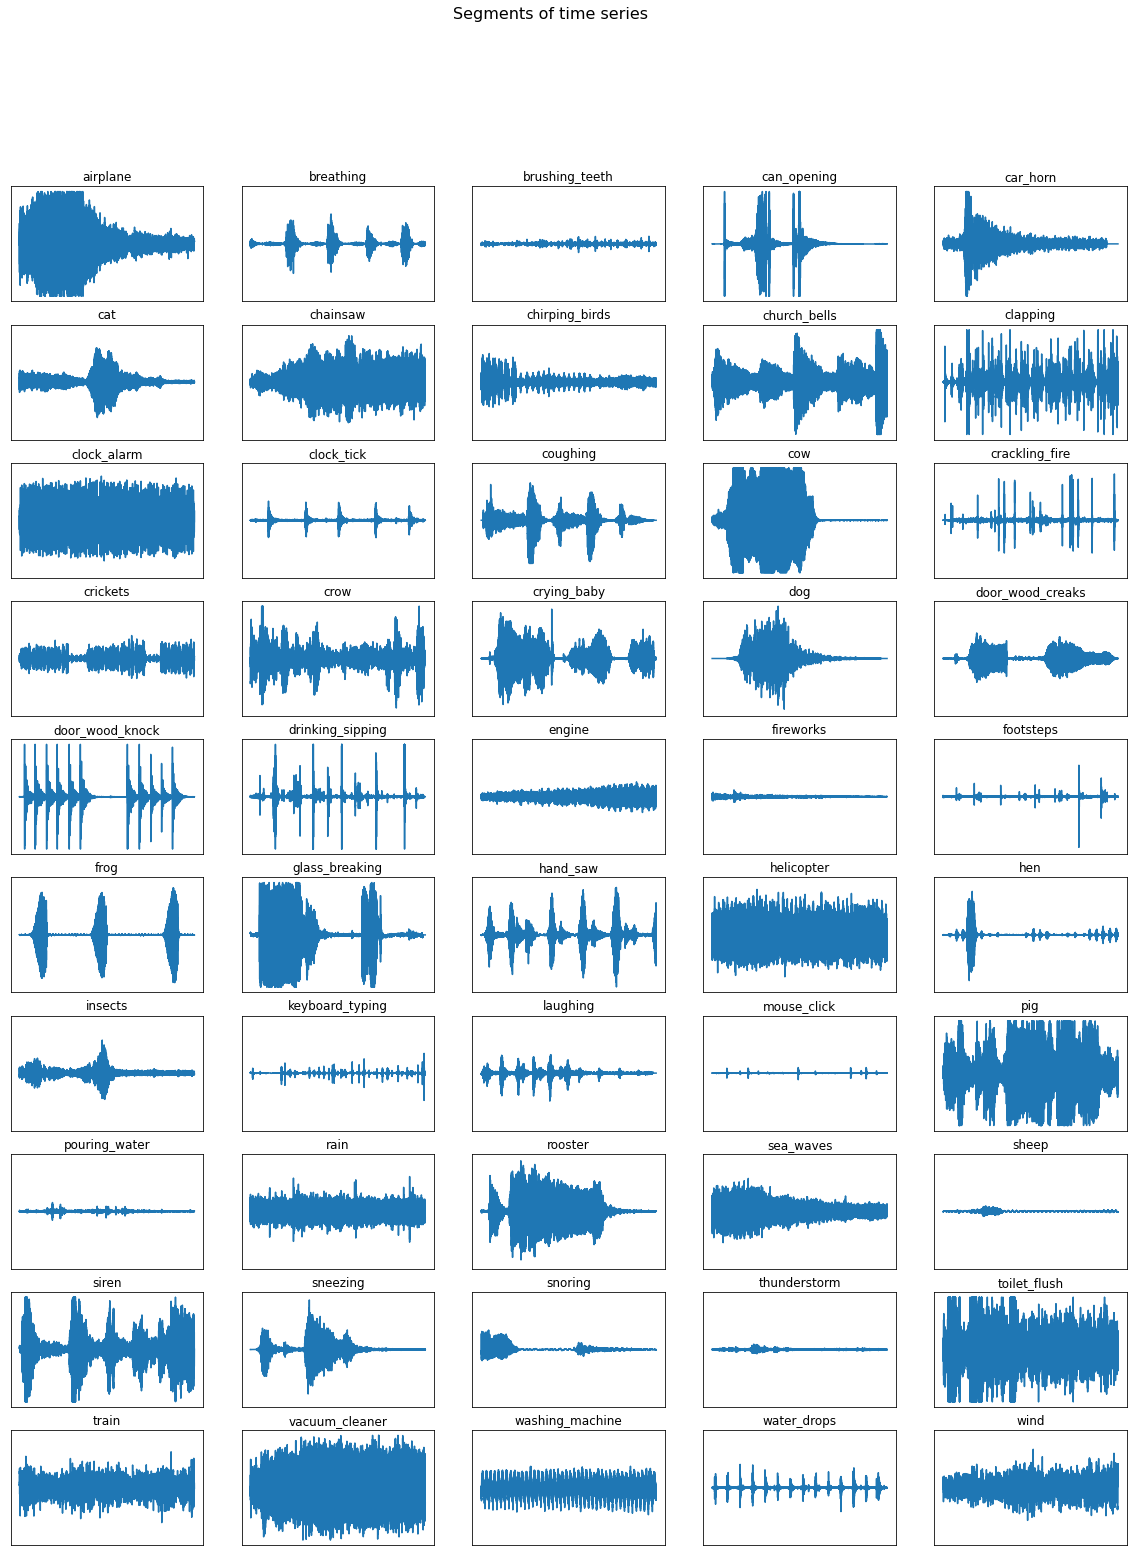

In [0]:
#plot time series to check consistency
segs={}
for c in classes:
  wav_file = esc50[esc50.category == c].iloc[0,0]#one sample for each class_the first
  segs[c] = segments[wav_file]
plot_segments(segs)
plt.show()

In [16]:
#Save segmented audio
import sys
'''
def save_obj(obj, name ):
    with open(data_path+name, 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

filename = 'segments.pkl'
save_obj(segments,filename)
'''
print(sys.getsizeof(segments))

73824


In [0]:
#Save dataframe
'''
esc50.reset_index(inplace=True)
filename='esc50_segments.csv'
esc50.to_csv(data_path+filename,header=True,index=False)
esc50.set_index('filename',inplace=True)
'''

# **SKILL POINT - SEGMENTS**

In [18]:
#Retrieve saved file
filename = 'segments.pkl'
def load_obj(name ):
    with open(data_path + name, 'rb') as f:
        return pickle.load(f)

segments=load_obj(filename)
print(len(segments))

2000


In [20]:
#load dataframe
filename='esc50_segments.csv'
esc50=pd.read_csv(data_path+filename)
esc50.set_index('filename',inplace=True)

print(esc50.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1-100032-A-0.wav to 5-9032-A-0.wav
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fold      2000 non-null   int64  
 1   target    2000 non-null   int64  
 2   category  2000 non-null   object 
 3   esc10     2000 non-null   bool   
 4   src_file  2000 non-null   int64  
 5   take      2000 non-null   object 
 6   length    2000 non-null   float64
 7   Segment   2000 non-null   float64
dtypes: bool(1), float64(2), int64(3), object(2)
memory usage: 127.0+ KB
None


In [21]:
fold_dist=esc50.groupby(['fold','category'])['Segment'].mean()#8 files of each class in each fold
print(fold_dist)

fold  category       
1     airplane           5.000000
      breathing          3.024977
      brushing_teeth     4.506641
      can_opening        2.326706
      car_horn           3.213228
                           ...   
5     train              5.000000
      vacuum_cleaner     4.880740
      washing_machine    4.987259
      water_drops        3.051148
      wind               5.000000
Name: Segment, Length: 250, dtype: float64


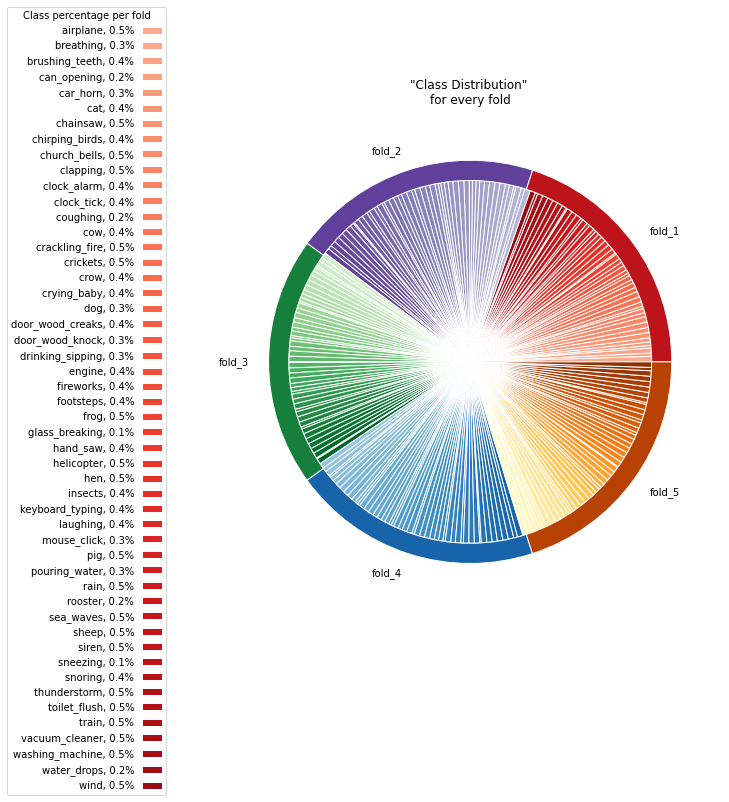

In [0]:
# Plot FOLD DISTRIBUTION
#*https://stackoverflow.com/questions/57720935/how-to-use-correct-cmap-colors-in-nested-pie-chart-in-matplotlib

fpf=np.array((esc50.groupby(['fold'])['category'].count()/len(esc50.index)*100).astype(int))
#fpf =[20, 20, 20, 20 ,20] #Percentage of files for each folder
cpf=np.array((fold_dist/len(esc50.index))*100)#class percentage in each folder
#cpf = np.array(np.ones(250)*0.4)

fig ,ax = plt.subplots(figsize=(10,10))
fig.subplots_adjust(0.3,0,1,1)

size = 0.1#size of the outer
total = sum(fold_dist)

#one for each fold
cmap1 = plt.cm.Reds
cmap2 = plt.cm.Purples
cmap3 = plt.cm.Greens
cmap4 = plt.cm.Blues
cmap5 = plt.cm.YlOrBr

outer_colors = [cmap1(.8), cmap2(.8), cmap3(.8),cmap4(.8),cmap5(.8)]
inner_colors = [*cmap1(np.linspace(.3, .9, 50)),
                *cmap2(np.linspace(.4, .8, 50)),
                *cmap3(np.linspace(.2, .9, 50)),
                *cmap4(np.linspace(.4, .8, 50)),
                *cmap5(np.linspace(.1, .9, 50)),]

#folds =  list (np.unique(esc50.fold))
folds = ['fold_1','fold_2','fold_3','fold_4','fold_5']

ax.pie(cpf, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=1, edgecolor='w'))

ax.pie(fpf, radius=1, labels=folds, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='\"Class Distribution\" \nfor every fold')

plt.legend(
  loc='upper left',
  labels=['%s, %1.1f%%' % (
      l,(float(s) / total) * 100) for l, s in zip(classes, fold_dist)],
  bbox_to_anchor=(0.0, 1),
  bbox_transform=fig.transFigure,
  markerfirst=False,
  title='Class percentage per fold'
)


In [0]:
for i in range(len(fold_dist)):
  new[i]
print(fold_dist[0:50])

fold  category        
1     airplane            5.000000
      breathing           3.024977
      brushing_teeth      4.506641
      can_opening         2.326706
      car_horn            3.213228
      cat                 3.784643
      chainsaw            4.902639
      chirping_birds      4.611052
      church_bells        5.000000
      clapping            4.977925
      clock_alarm         3.681681
      clock_tick          3.901134
      coughing            2.247727
      cow                 3.988733
      crackling_fire      4.998810
      crickets            5.000000
      crow                4.122829
      crying_baby         4.553736
      dog                 3.152778
      door_wood_creaks    4.120451
      door_wood_knock     2.586655
      drinking_sipping    3.292443
      engine              4.469425
      fireworks           3.648682
      footsteps           3.778855
      frog                4.984444
      glass_breaking      1.487477
      hand_saw            4.3295

In [50]:
print(fold_dist.index.get_level_values(1)[0:50])

Index(['airplane', 'breathing', 'brushing_teeth', 'can_opening', 'car_horn',
       'cat', 'chainsaw', 'chirping_birds', 'church_bells', 'clapping',
       'clock_alarm', 'clock_tick', 'coughing', 'cow', 'crackling_fire',
       'crickets', 'crow', 'crying_baby', 'dog', 'door_wood_creaks',
       'door_wood_knock', 'drinking_sipping', 'engine', 'fireworks',
       'footsteps', 'frog', 'glass_breaking', 'hand_saw', 'helicopter', 'hen',
       'insects', 'keyboard_typing', 'laughing', 'mouse_click', 'pig',
       'pouring_water', 'rain', 'rooster', 'sea_waves', 'sheep', 'siren',
       'sneezing', 'snoring', 'thunderstorm', 'toilet_flush', 'train',
       'vacuum_cleaner', 'washing_machine', 'water_drops', 'wind'],
      dtype='object', name='category')


In [22]:
folds =  list (np.unique(esc50.fold))
print(folds)

[1, 2, 3, 4, 5]


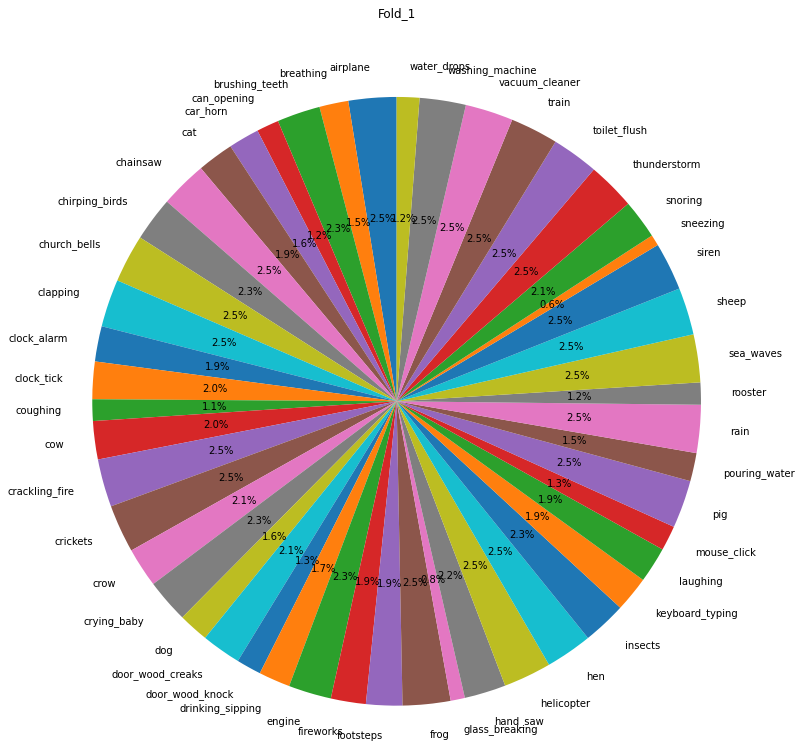

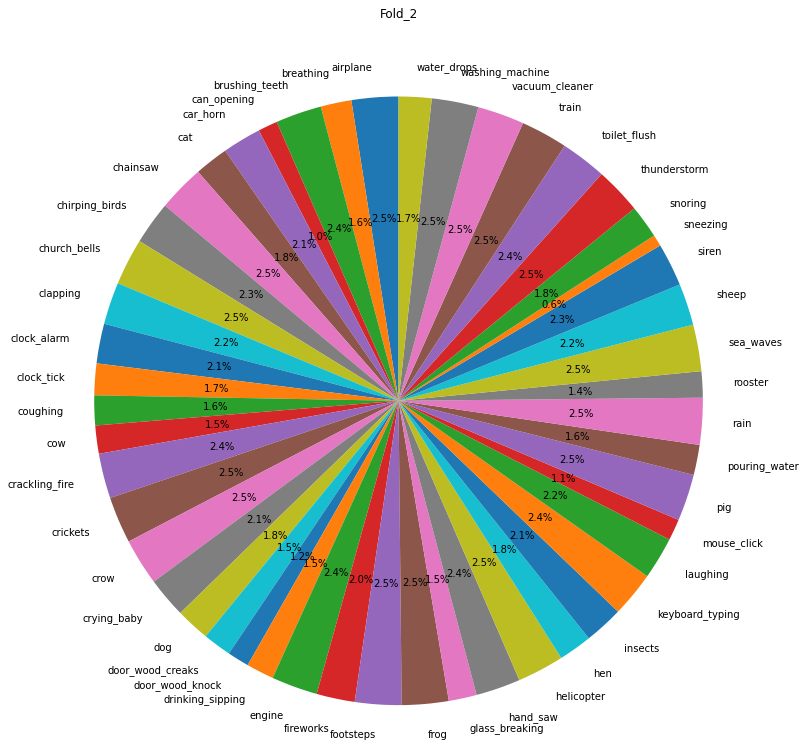

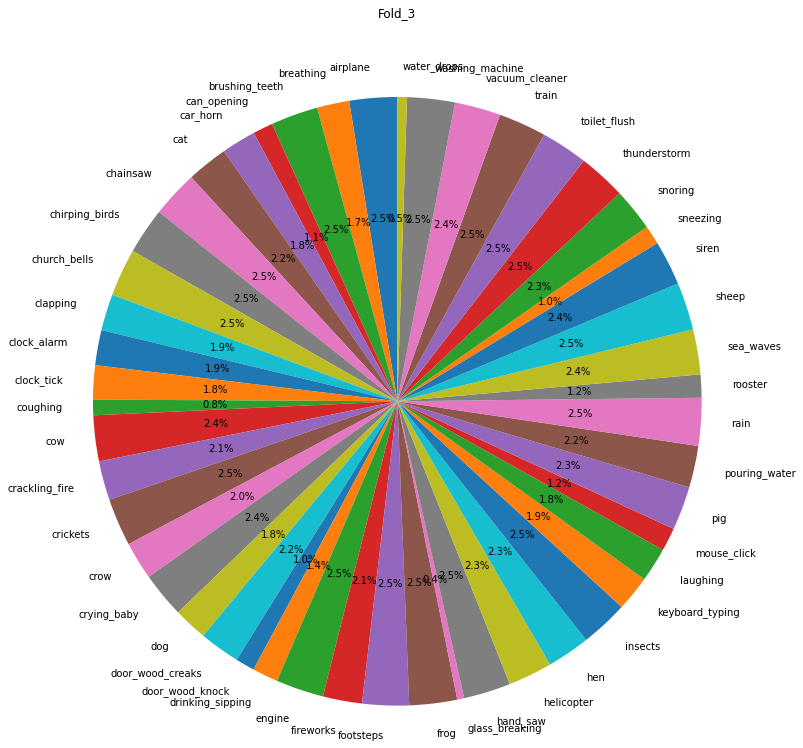

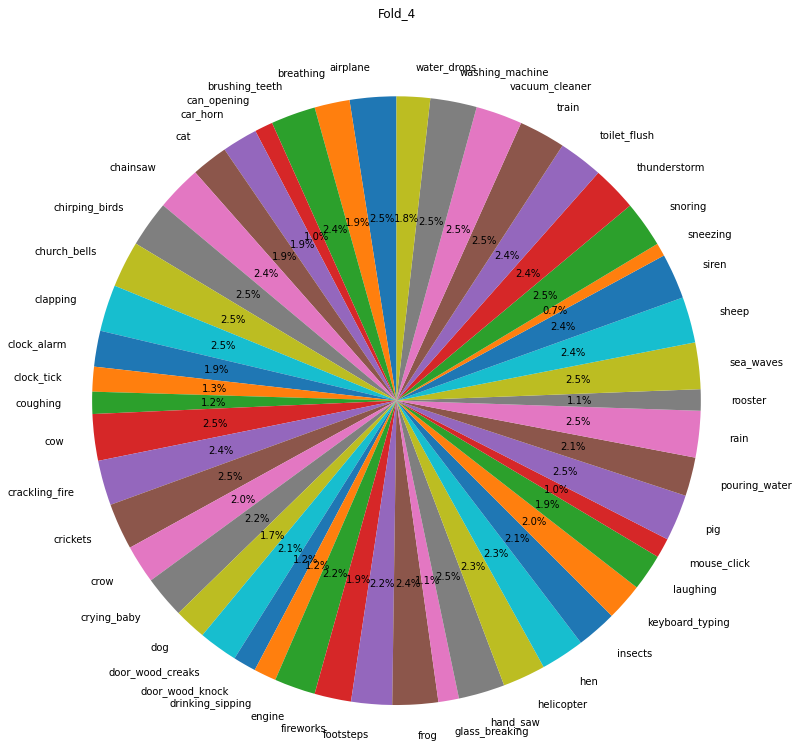

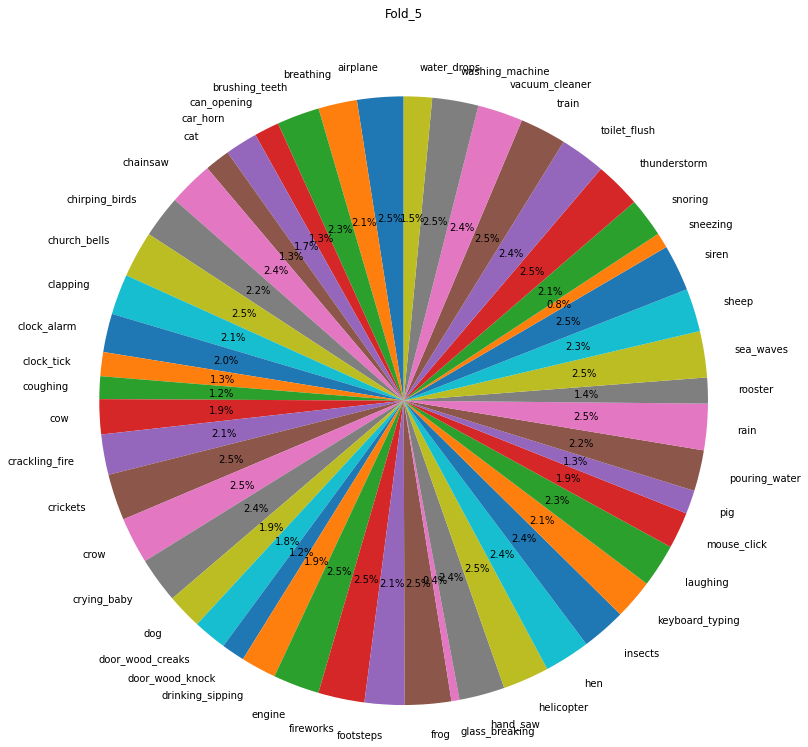

In [52]:
# Plot the new fold distribution for the segmented files
for f in folds:
  down_limit=(f-1)*50 #0-50-100-150-250
  up_limit=(f*50)-1  #49-99-149-199-249

  fig ,ax = plt.subplots(figsize=(12,12))

  title='Fold_'+str(f)
  ax.set_title(title, y=1.08)
  
  ax.pie(fold_dist[down_limit:up_limit], labels=fold_dist.index.get_level_values('category')[down_limit:up_limit], autopct='%1.1f%%', shadow=False, startangle=90 ,radius=37)

  ax.axis('equal')#circle               
  plt.show()

In [0]:
!cd gdrive
!ls

In [0]:
esc50.reset_index(inplace=True)
s_esc50=esc50

s_esc50.set_index('filename',inplace=True)
print(s_esc50.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1-100032-A-0.wav to 5-9032-A-0.wav
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     2000 non-null   int64  
 1   fold      2000 non-null   int64  
 2   target    2000 non-null   int64  
 3   category  2000 non-null   object 
 4   esc10     2000 non-null   bool   
 5   src_file  2000 non-null   int64  
 6   take      2000 non-null   object 
 7   length    2000 non-null   float64
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 127.0+ KB
None


In [0]:
#Analysis of segmented audio {basic calc} I
rate=44100
for f in tqdm(s_esc50.index):
  duration = len(segments[f])/rate
 
  s_esc50.at[f, 'length']=duration


######
'''
  rate, signal = wavfile.read('/content/gdrive/My Drive/dissertation/ESC-50-master/audio/'+f)
  
  esc50.at[f, 'length']=signal.shape[0]/rate

classes =  list (np.unique(esc50.category))
print(classes)

class_dist = esc50.groupby(['category'])['length'].mean()
print(class_dist)
'''
###
'''
s_esc50.reset_index(inplace=True)
#esc50.to_csv('../content/gdrive/My Drive/dissertation/ESC-50-master/meta/esc50_datalengthadded.csv',header=True,index=False)
#esc50.set_index('filename',inplace=True)
#No need to mean-> everything is 5sec long

#class_dist_seg = esc50.groupby(['category'])['length'].mean()
#print(class_dist_seg)
seg_class_dist = s_esc50.groupby(['category'])['length'].mean()
print(seg_class_dist)

seg_class_dev = s_esc50.groupby(['target'])['length'].std()
print(seg_class_dev)  
'''  

In [0]:
#Analysis of segmented audio {alt} II
seg_class_dist = s_esc50.groupby(['category'])['length'].mean()
#print(seg_class_dist)

seg_class_dev = s_esc50.groupby(['category'])['length'].std()
#print(seg_class_dev)

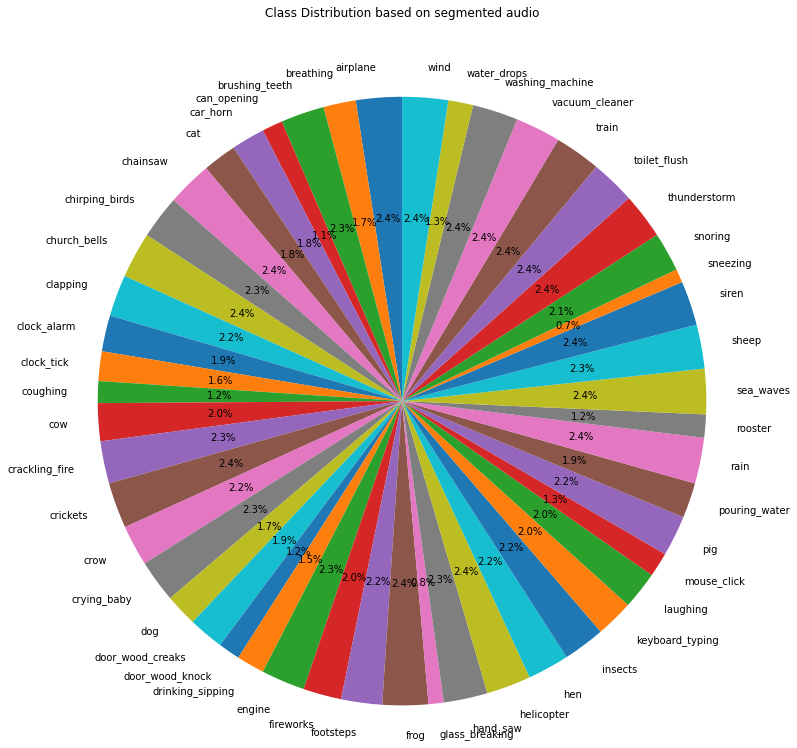

In [0]:
# Plot Class Distribution based on segmented audio

fig ,ax = plt.subplots(figsize=(12,12))
ax.set_title('Class Distribution based on segmented audio', y=1.08)
ax.pie(seg_class_dist, labels=class_dist.index, autopct='%1.1f%%', shadow=False, startangle=90 ,radius=37)
ax.axis('equal')#circle
plt.show()

In [0]:
#@title Downsampling
def downsample_mono(path, sr):
    rate, wav = wavfile.read(path)
    wav = resample(wav.astype(np.float32), rate, sr)
    wav = wav.astype(np.int16)
    # checks stereo and converts to mono if nessesary
    try:
        tmp = wav.shape[1]
        wav = wav[:,0]+wav[:,1] / 2
    except:
        pass
    return sr, wav